In [37]:
import json
import os
import datetime

# add datascience libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
sns.set(style="whitegrid")
results_dir = '../results'
results_arr = []

In [39]:
with open(os.path.join(results_dir, 'result.json')) as f:
  # load the data
  data = json.loads(f.read())
  client_side_data = data["lineitem"]["fbx"]
    
  # prepare the numpy array
  for key, value in client_side_data.items():
    points = value.split(",")
    for point in points:
      results_arr.append([key, point, 'client'])

In [40]:
with open(os.path.join(results_dir, 'result.json')) as f:
  # load the data
  data = json.loads(f.read())
  storage_side_data = data["lineitem"]["fbx_cls"]
    
  # prepare the numpy array
  for key, value in storage_side_data.items():
    points = value.split(",")
    for point in points:
      results_arr.append([key, point, 'storage'])

In [41]:
# convert to dataframes
df = pd.DataFrame(np.array(results_arr), columns=['Selectivity', 'Duration(s)', 'Processing Side'])
df[['Duration(s)']] = df[['Duration(s)']].apply(pd.to_numeric)

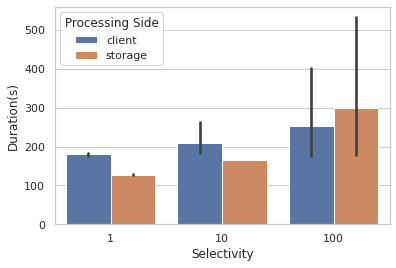

In [42]:
# plot
ax = sns.barplot(x="Selectivity", y="Duration(s)", hue="Processing Side", data=df)
ax.figure.savefig(os.path.join(results_dir, "plot.png"), dpi=200)
ax.figure.show()